## Описание проекта

Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения.

Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

После этого исследуйте результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.

Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.

В случае общей аналитики и A/A/B-эксперимента работайте с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

## Описание данных

Каждая запись в логе — это действие пользователя, или событие.
- EventName — название события;
- DeviceIDHash — уникальный идентификатор пользователя;
- EventTimestamp — время события;
- ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

## Шаг 1. Загрузка файла с данными и изучение общей информации

 <a id="some_id">Шаг 2. Подготовка данных</a>
- Замена названий столбцов;
- Проверка пропусков и типов данных;
- Добавление столбца даты и времени, а также отдельный столбец дат;

<a id="some_id">Шаг 3. Изучение и проверка данные</a>

Необходимо ответить на опросы 

- Сколько всего событий в логе?
- Сколько всего пользователей в логе?
- Сколько в среднем событий приходится на пользователя?
- Данными за какой период мы располагаем? Можно ли быть уверенным, что у нас одинаково полные данные за весь период? 
- Определить, с какого момента данные полные и отбросить более старые. Данными за какой период времени мы располагаем на самом деле?
- Много ли событий и пользователей мы потеряли, отбросив старые данные?

<a id="some_id">Шаг 4. Изучение воронки событий</a>

- Посмотреть, какие события есть в логах, как часто они встречаются. Отсортировать события по частоте.
- Посчитать, сколько пользователей совершали каждое из этих событий. Отсортироваать события по числу пользователей. Посчитать долю пользователей, которые хоть раз совершали событие.
- Предположить, в каком порядке происходят события. 
- По воронке событий посчитать, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). 
- На каком шаге теряем больше всего пользователей?
- Какая доля пользователей доходит от первого события до оплаты?

<a id="some_id">Шаг 5. Изучение результатов эксперимента</a>

- Сколько пользователей в каждой экспериментальной группе?
- Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверить, находят ли статистические критерии разницу между выборками 246 и 247.
- Выберать самое популярное событие. Посчитать число пользователей, совершивших это событие в каждой из контрольных групп. Посчитать долю пользователей, совершивших это событие. Проверить, будет ли отличие между группами статистически достоверным. Проделать то же самое для всех других событий.
- Аналогично поступить с группой с изменённым шрифтом. Сравнить результаты с каждой из контрольных групп в отдельности по каждому событию. Сравнить результаты с объединённой контрольной группой. 
- Посчитать, сколько проверок статистических гипотез мы сделали. 

## Шаг 1

In [1]:
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install seaborn
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats as st
import seaborn as sns
from IPython.display import display
import numpy as np
import math, cmath

import warnings
warnings.filterwarnings('ignore')

In [3]:
logs = pd.read_csv('/datasets/logs_exp.csv', sep = '\t')

In [4]:
display(logs.head(10))
logs.info()
logs.describe()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
EventName         244126 non-null object
DeviceIDHash      244126 non-null int64
EventTimestamp    244126 non-null int64
ExpId             244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


,DeviceIDHash,EventTimestamp,ExpId
count,2.441260e+05,2.441260e+05,244126.000000
mean,4.627568e+18,1.564914e+09,247.022296
std,2.642425e+18,1.771343e+05,0.824434
min,6.888747e+15,1.564030e+09,246.000000
25%,2.372212e+18,1.564757e+09,246.000000
50%,4.623192e+18,1.564919e+09,247.000000
75%,6.932517e+18,1.565075e+09,248.000000
max,9.222603e+18,1.565213e+09,248.000000


## Шаг 2

In [5]:
#заменим названия столбцов, приведя к нижнему регистру
logs.columns = logs.columns.str.lower()

In [6]:
# для удобства изменим названия столбцов
logs = logs.rename(columns = {'eventname':'event_name','deviceidhash':'device_id_hash','eventtimestamp':'event_timestamp','expid':'exp_id'})

In [7]:
logs.head(10)

,event_name,device_id_hash,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246


In [8]:
logs.isna().sum()

event_name         0
device_id_hash     0
event_timestamp    0
exp_id             0
dtype: int64

In [9]:
print('Количество дублей:', logs.duplicated().sum())

Количество дублей: 413


In [10]:
logs = logs.drop_duplicates().reset_index(drop=True) 

In [11]:
# Добавьте столбец даты и времени, а также отдельный столбец дат;
logs['date_and_time'] = pd.to_datetime(logs['event_timestamp'], unit='s').apply(lambda x: x.to_datetime64())

In [12]:
logs.head(10)

,event_name,device_id_hash,event_timestamp,exp_id,date_and_time
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42
5,CartScreenAppear,6217807653094995999,1564055323,248,2019-07-25 11:48:43
6,OffersScreenAppear,8351860793733343758,1564066242,246,2019-07-25 14:50:42
7,MainScreenAppear,5682100281902512875,1564085677,246,2019-07-25 20:14:37
8,MainScreenAppear,1850981295691852772,1564086702,247,2019-07-25 20:31:42
9,MainScreenAppear,5407636962369102641,1564112112,246,2019-07-26 03:35:12


In [13]:
logs['date'] = logs['date_and_time'].dt.date
logs['date'] = logs['date'].astype('datetime64[M]')

In [14]:
logs.head(10)

,event_name,device_id_hash,event_timestamp,exp_id,date_and_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-01
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-01
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-01
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-01
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-01
5,CartScreenAppear,6217807653094995999,1564055323,248,2019-07-25 11:48:43,2019-07-01
6,OffersScreenAppear,8351860793733343758,1564066242,246,2019-07-25 14:50:42,2019-07-01
7,MainScreenAppear,5682100281902512875,1564085677,246,2019-07-25 20:14:37,2019-07-01
8,MainScreenAppear,1850981295691852772,1564086702,247,2019-07-25 20:31:42,2019-07-01
9,MainScreenAppear,5407636962369102641,1564112112,246,2019-07-26 03:35:12,2019-07-01


Были изменены названия колонок на более удобные, удалены дубли и добавлены столбцы с датами. Данные подготовлены для последующего анализа.

## Шаг 3

In [15]:
# Сколько всего событий в логе?
len(logs['event_name'])

243713

In [16]:
# Сколько всего пользователей в логе?
len(logs['device_id_hash'].unique())

7551

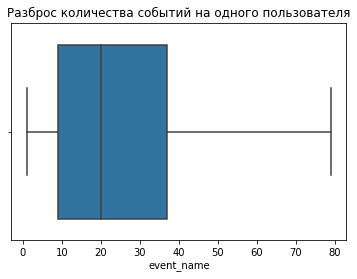

In [17]:
# Сколько в среднем событий приходится на пользователя?
sns.boxplot(logs.groupby('device_id_hash')['event_name'].count(),  showfliers=False )
plt.title('Разброс количества событий на одного пользователя');
plt.show()

Пока достаточно сложно что-то сказать, кроме того, что есть пара сильно активных клиентов. Медиану разглядеть сложно. Однако, уже сейчас отметим, что большая часть пользователей посещает наше приложение не так часто. Посчитаем среднее количество и медиану.

In [18]:
print('Среднее количество событий на одного пользователя - {:.0f}'.format(logs.groupby('device_id_hash')['event_name'].count().mean()))
print('Медиана количества событий на одного пользователя - {:.0f}'.format(logs.groupby('device_id_hash')['event_name'].count().median()))

Среднее количество событий на одного пользователя - 32
Медиана количества событий на одного пользователя - 20


Учитывая, что есть пользователи с экстримально большим количеством посещений, лучше ориентироваться на медиану.

In [19]:
# Найдем минимальную и максимальную дату
print ('Минимальная дата -', logs['date'].min())
print ('Максимальная дата -', logs['date'].max())

Минимальная дата - 2019-07-01 00:00:00
Максимальная дата - 2019-08-01 00:00:00


Имеем логи за 2 недели

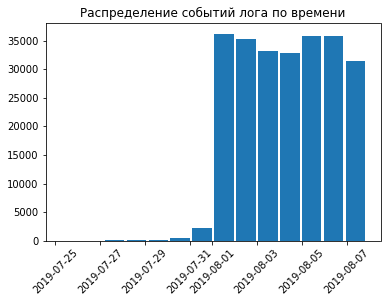

In [20]:
logs['date_and_time'].hist(bins=14, grid=False, rwidth=0.9) # логи за 14 дней
plt.xticks(rotation=45)
plt.title('Распределение событий лога по времени');

Согласно гистограмме у нас почти нет данных за первую неделю. В связи с этим будет корректнее отсечь данные за июль и использовать только август. 

In [21]:
# Отсекаем ненужное
new_logs = logs.loc[logs['date'] > '2019-07-31']

In [22]:
print('Всего событий в логе', len(new_logs['event_name']))
print('Всего пользователей в логе',len(new_logs['device_id_hash'].unique()))

Всего событий в логе 240887
Всего пользователей в логе 7534


In [23]:
print('Потеряли процент событий:', round((len(logs['event_name']) - len(new_logs['event_name'])) / len(new_logs['event_name']) * 100, 2))
print('Потеряли процент пользователей:', round((len(logs['device_id_hash'].unique()) - len(new_logs['device_id_hash'].unique())) / len(new_logs['device_id_hash'].unique()) * 100, 2))

Потеряли процент событий: 1.17
Потеряли процент пользователей: 0.23


Потери составили около 1%, можно считать их несущественными.

Проверим, что у нас есть пользователи из всех трёх экспериментальных групп.

In [24]:
#проверим, что остались пользователи из всех трех экспериментальных групп
new_logs.groupby('exp_id').agg({'device_id_hash' : 'nunique'})

,device_id_hash
exp_id,
246,2484
247,2513
248,2537


Выборка была немного укорочена, оставили для анализа только данные за первую неделю августа 2019. Кроме того удостоверились что пересечений в группах нет. Данные изучены и проверены, теперь можно приступить к анализу.

## Шаг 4

In [25]:
# Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.
events_count = logs['event_name'].value_counts().reset_index().rename(columns={'index':'event_name', 'event_name':'count'})
events_count

,event_name,count
0,MainScreenAppear,119101
1,OffersScreenAppear,46808
2,CartScreenAppear,42668
3,PaymentScreenSuccessful,34118
4,Tutorial,1018


В логе представлено пять различных событий.

- MainScreenAppear - появление главного экрана, по всей видимости фиксируется вход в приложение
- OffersScreenAppear - появление экрана с предложениями/продуктами
- CartScreenAppear - появление экрана с корзиной, пользователь накидал товаров в корзину и открыл её
- PaymentScreenSuccessful - появление экрана с подтвреждением оплаты, пользователь оплатил товар и оплата прошла успешно
- Tutorial - обучение, сколько пользователей прошло обучение. Интересно, в какой момент можно пройти обучение, до главного экрана или в любой момент

Сразу видно, что большая часть аудитории не проходит дальше первого этапа

In [26]:
funnel = (logs.groupby('event_name')['device_id_hash']
          .nunique().reset_index().sort_values(by='device_id_hash', ascending=False)
          .rename(columns={'device_id_hash':'unique_count'}))
funnel

,event_name,unique_count
1,MainScreenAppear,7439
2,OffersScreenAppear,4613
0,CartScreenAppear,3749
3,PaymentScreenSuccessful,3547
4,Tutorial,847


События происходят в следующем порядке:
- MainScreenAppear - переход на главный экран;
- OffersScreenAppear - переход на страницу товара;
- CartScreenAppear - переход в корзину;
- PaymentScreenSuccessful - успешная оплата покупки;
- Tutorial - обучение

Обучение не имеет отношения к рассматриваемыми нами вопросу, поэтому не вижу необходимости его рассмотрения в дальнейшей работе.

In [27]:
#соберем данные в один датасет
new_events = events_count.merge(funnel, on='event_name')
new_events.columns = ['event_name', 'users_count', 'unique_users_count']
new_events = new_events.sort_values(by='users_count', ascending=False)
new_events

,event_name,users_count,unique_users_count
0,MainScreenAppear,119101,7439
1,OffersScreenAppear,46808,4613
2,CartScreenAppear,42668,3749
3,PaymentScreenSuccessful,34118,3547
4,Tutorial,1018,847


Далее найдем долю пользователей, которые хоть раз совершали событие

In [28]:
#доля пользователей, которые хоть раз совершали событие
new_events['pies'] = ((new_events['unique_users_count'] / new_logs['device_id_hash'].nunique()) * 100).round(2)
new_events = new_events.reset_index(drop=True)
new_events

,event_name,users_count,unique_users_count,pies
0,MainScreenAppear,119101,7439,98.74
1,OffersScreenAppear,46808,4613,61.23
2,CartScreenAppear,42668,3749,49.76
3,PaymentScreenSuccessful,34118,3547,47.08
4,Tutorial,1018,847,11.24


In [29]:
# посчитайте, какая доля пользователей проходит на следующий шаг воронки 
funnel_no_tutorial = (new_logs.groupby('event_name')['device_id_hash']
          .nunique().reset_index().sort_values(by='device_id_hash', ascending=False)
          .rename(columns={'device_id_hash':'unique_count'}).drop(4))
funnel_no_tutorial

,event_name,unique_count
1,MainScreenAppear,7419
2,OffersScreenAppear,4593
0,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539


In [30]:
funnel_no_tutorial['conversion'] = None
funnel_no_tutorial.iloc[0,2] = 1
funnel_no_tutorial.iloc[1,2] = funnel_no_tutorial.iloc[1,1] / funnel_no_tutorial.iloc[0,1] 
funnel_no_tutorial.iloc[2,2] = funnel_no_tutorial.iloc[2,1] / funnel_no_tutorial.iloc[1,1]
funnel_no_tutorial.iloc[3,2] = funnel_no_tutorial.iloc[3,1] / funnel_no_tutorial.iloc[2,1]

In [31]:
funnel_no_tutorial

,event_name,unique_count,conversion
1,MainScreenAppear,7419,1
2,OffersScreenAppear,4593,0.619086
0,CartScreenAppear,3734,0.812976
3,PaymentScreenSuccessful,3539,0.947777


Больше всего мы теряем пользователей после первого шага. 38% пользователей не пошли дальше первого шага.

In [32]:
print('{:.2%} пользователей дошли от первого шага до успешной покупки'.format(funnel_no_tutorial.iloc[3,1] / funnel_no_tutorial.iloc[0,1]))

47.70% пользователей дошли от первого шага до успешной покупки


In [33]:
#для каждого пользователя посчитаем время совершения каждого события
users = new_logs.pivot_table(index='device_id_hash', columns='event_name', values='date_and_time', aggfunc='min')
users.head(10)

event_name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
device_id_hash,,,,,
6888746892508752,NaT,2019-08-06 14:06:34,NaT,NaT,NaT
6909561520679493,2019-08-06 18:52:58,2019-08-06 18:52:54,2019-08-06 18:53:04,2019-08-06 18:52:58,NaT
6922444491712477,2019-08-04 14:19:40,2019-08-04 14:19:33,2019-08-04 14:19:46,2019-08-04 14:19:40,NaT
7435777799948366,NaT,2019-08-05 08:06:34,NaT,NaT,NaT
7702139951469979,2019-08-02 14:28:45,2019-08-01 04:29:54,2019-08-01 04:29:56,2019-08-02 14:28:45,NaT
8486814028069281,2019-08-05 04:49:18,2019-08-05 04:52:40,2019-08-05 04:49:13,NaT,NaT
8740973466195562,NaT,2019-08-02 09:16:48,2019-08-02 09:43:59,NaT,NaT
9841258664663090,2019-08-03 10:52:15,2019-08-03 10:47:59,2019-08-03 10:49:42,2019-08-03 17:57:27,2019-08-03 10:47:28
12692216027168046,NaT,2019-08-02 16:28:49,2019-08-05 04:06:02,NaT,NaT


In [34]:
#узнаем, сколько пользователей переходило на каждый шаг воронки с учетом совершения предыдущего шага

#посчитаем пользователей на каждом этапе воронки
step_1 = ~users['MainScreenAppear'].isna() #шаг1
step_2 = step_1 & (users['OffersScreenAppear'] > users['MainScreenAppear']) #шаг2
step_3 = step_2 & (users['CartScreenAppear'] > users['OffersScreenAppear']) #шаг3
step_4 = step_3 & (users['PaymentScreenSuccessful'] > users['CartScreenAppear']) #шаг4

#условия для каждого шага
n_mainscreen = users[step_1].shape[0]
n_offers = users[step_2].shape[0]
n_carts = users[step_3].shape[0]
n_payment = users[step_4].shape[0]

#выведем результаты
print('Посетителей:', n_mainscreen)
print('Перешли на страницу с товаром:', n_offers)
print('Добавили товар в корзину:', n_carts)
print('Совершили оплату заказа:', n_payment)

Посетителей: 7419
Перешли на страницу с товаром: 4201
Добавили товар в корзину: 1767
Совершили оплату заказа: 454


454 пользователя прошли все пять событий. После составления воронки обнаружили, что после первого шага отсеивается около 39% пользователей, после последующих шагов потери существенно меньше. Необходимо передать коллегам о нашем слабом месте, попробовать заинтересовать большее количество пользователей. 

## Шаг 5

In [35]:
# Сколько пользователей в каждой экспериментальной группе?
exp_users = new_logs.groupby('exp_id').agg({'device_id_hash' : 'nunique'})
exp_users = exp_users.reset_index()
exp_users

,exp_id,device_id_hash
0,246,2484
1,247,2513
2,248,2537


Далее сформируем таблицу с количеством пользователей с разбивкой по группам и событиям 

In [36]:
#соберем таблицу с результатами эксперимента по группам
#группы:
all_funnels = new_logs.pivot_table(index='event_name', columns='exp_id',values='device_id_hash',aggfunc='nunique')\
                       .sort_values(246,ascending=False)
all_funnels['246+247'] = all_funnels[246] + all_funnels[247]
all_funnels.drop(['Tutorial'], inplace=True)
all_funnels

exp_id,246,247,248,246+247
event_name,,,,
MainScreenAppear,2450,2476,2493,4926
OffersScreenAppear,1542,1520,1531,3062
CartScreenAppear,1266,1238,1230,2504
PaymentScreenSuccessful,1200,1158,1181,2358


In [37]:
users = new_logs.groupby('exp_id')['device_id_hash'].nunique()
users

exp_id
246    2484
247    2513
248    2537
Name: device_id_hash, dtype: int64

In [38]:
users = users.to_frame().reset_index()
users.loc[3] = ['246+247', 4997]

In [39]:
users = users.set_index(users.columns[0])
users

,device_id_hash
exp_id,
246,2484
247,2513
248,2537
246+247,4997


In [40]:
# Воспользуемся Z-критерием
def z_test(exp1, exp2, event, alpha): 
    p1_ev = all_funnels.loc[event, exp1]
    p2_ev = all_funnels.loc[event, exp2] 
    p1_us = users.loc[exp1, 'device_id_hash'] 
    p2_us = users.loc[exp2, 'device_id_hash'] 
    p1 = p1_ev / p1_us 
    p2 = p2_ev / p2_us 
    difference = p1 - p2
    p_combined = (p1_ev + p2_ev) / (p1_us + p2_us) 
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1 / p1_us + 1 / p2_us))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('Проверка для  {} и {}, событие: {}, p-значение: {p_value:.2f}'.format(exp1, exp2, event, p_value=p_value))
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

Сформулируем гипотезы:
- Н0: статистической значимости различий между долями пользователей в группах 246 и 247 нет
- Н1: статистическая значимость различий между долями пользователей в группах 246 и 247 есть

In [41]:
for event in all_funnels.index:
    z_test(246, 247, event, 0.05)
    print()

Проверка для  246 и 247, событие: MainScreenAppear, p-значение: 0.76
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 247, событие: OffersScreenAppear, p-значение: 0.25
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 247, событие: CartScreenAppear, p-значение: 0.23
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 247, событие: PaymentScreenSuccessful, p-значение: 0.11
Не получилось отвергнуть нулевую гипотезу



Таким образом, не получается отвергнуть нулевую гипотизу о равенстве долей, статистической значимости между долями нет.

Сформулируем гипотезы:
- Н0: статистической значимости различий между долями пользователей в группах 246 и 248 нет
- Н1: статистическая значимость различий между долями пользователей в группах 246 и 248 есть

In [42]:
for event in all_funnels.index:
    z_test(246, 248, event, 0.05)
    print()

Проверка для  246 и 248, событие: MainScreenAppear, p-значение: 0.29
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 248, событие: OffersScreenAppear, p-значение: 0.21
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 248, событие: CartScreenAppear, p-значение: 0.08
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 248, событие: PaymentScreenSuccessful, p-значение: 0.21
Не получилось отвергнуть нулевую гипотезу



Сформулируем гипотезы:
- Н0: статистической значимости различий между долями пользователей в группах 247 и 248 нет
- Н1: статистическая значимость различий между долями пользователей в группах 247 и 248 есть

In [43]:
for event in all_funnels.index:
    z_test(247, 248, event, 0.05)
    print()

Проверка для  247 и 248, событие: MainScreenAppear, p-значение: 0.46
Не получилось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: OffersScreenAppear, p-значение: 0.92
Не получилось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: CartScreenAppear, p-значение: 0.58
Не получилось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: PaymentScreenSuccessful, p-значение: 0.74
Не получилось отвергнуть нулевую гипотезу



В данном эксперименте также не получается отвергнуть нулевую гипотизу о равенстве долей, статистической значимости между долями нет.

Сформулируем гипотезы:
- Н0: статистической значимости различий между долями пользователей в группах 246+247 и 248 нет
- Н1: статистическая значимость различий между долями пользователей в группах 246+247 и 248 есть

In [44]:
for event in all_funnels.index:
    z_test('246+247', 248, event, 0.05)
    print()

Проверка для  246+247 и 248, событие: MainScreenAppear, p-значение: 0.29
Не получилось отвергнуть нулевую гипотезу

Проверка для  246+247 и 248, событие: OffersScreenAppear, p-значение: 0.43
Не получилось отвергнуть нулевую гипотезу

Проверка для  246+247 и 248, событие: CartScreenAppear, p-значение: 0.18
Не получилось отвергнуть нулевую гипотезу

Проверка для  246+247 и 248, событие: PaymentScreenSuccessful, p-значение: 0.60
Не получилось отвергнуть нулевую гипотезу



При тестировании контрольных групп с экспериментальной статистической значимости нет, значит не получилось отвергнуть нулевую гипотезу

### Вывод

Полные данные у нас только за вторую неделю: с 1 по 7 августа (брали без учета времени). Отбросив старые данные мы потеряли не много информации. Также видно что группы имеют примерно одинаковое количество пользователей.

События происходят в следующем порядке:
Люди заходят на главный экран сайта -> экран предложений -> корзина -> оплата прошла¶

В конечном итоге было проведено 4 AA теста и 12 AB тестов. Воронка показала, что статистически значимых различий нет при каждом тестировании. 

Критический уровень значимости перед проведением тестирований мы взяли 0.05. Перед A/B тестированием мы провели A/A тестирование групп и выяснилось, что всё впорядке и распределение на группы было корректным.

Мы провели A/B тестирование и не заметили статистически значимых отличий между контрольными группами и экспериментальной. Это значит, что внедрение чата с менеджером на сайт не дало никакого эффекта.

Проводя множественное сравнение при A/A и A/B тестированиях, мы не использовали никакие поправки критического уровня значимости, так как в этом не было никакого смысла - при уменьшении критического уровня значимости с помощью имеющихся поправок результаты тестирования не изменились бы, это видно из полученных p-value (минимальное p-value - 0.10).